In [1]:
import pandas as pd

### Load data

In [2]:
used_cars_df = pd.read_csv('raw_data/vehicles.csv')
used_cars_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
used_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

### Check columns

In [ ]:
used_cars_df.columns

In [ ]:
used_cars_df.drop(columns=['description'], inplace=True)

In [16]:
used_cars_df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'county', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

### Keep columns that are car-specific

In [17]:
cars = used_cars_df[['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']]

## Analyse car data

### Find the most popular car

In [30]:
cars['model'].value_counts()

f-150                       8009
silverado 1500              5140
1500                        4211
camry                       3135
silverado                   3023
                            ... 
Huyndai Sante Fe Limited       1
astro awd 4x4                  1
escalade and                   1
cx 3                           1
Paige Glenbrook Touring        1
Name: model, Length: 29667, dtype: int64

In [47]:
f150 = cars.loc[cars['model']=='f-150',:]
f150.fillna(value={'condition': 'unknown'}, inplace=True)
f150

C:\Users\User\AppData\Local\Temp\ipykernel_7868\1187809386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f150.fillna(value={'condition': 'unknown'}, inplace=True)


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
228,5500,1978.0,ford,f-150,good,8 cylinders,gas,239000.0,clean,automatic,NaN,full-size,truck,green
235,27995,2017.0,ford,f-150,unknown,NaN,gas,101000.0,clean,automatic,4wd,NaN,NaN,NaN
249,37500,2018.0,ford,f-150,unknown,NaN,gas,30026.0,clean,automatic,4wd,NaN,NaN,blue
337,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white
537,3500,2006.0,ford,f-150,unknown,NaN,gas,246000.0,clean,automatic,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426444,9000,2011.0,ford,f-150,unknown,8 cylinders,gas,165000.0,clean,automatic,4wd,NaN,NaN,NaN
426456,9500,1979.0,ford,f-150,unknown,NaN,gas,68000.0,clean,automatic,rwd,NaN,NaN,NaN
426613,26500,2015.0,ford,f-150,unknown,NaN,gas,61367.0,clean,automatic,4wd,NaN,pickup,red
426664,950,1995.0,ford,f-150,unknown,8 cylinders,gas,209452.0,clean,automatic,4wd,NaN,NaN,NaN


In [53]:
f150['drive'].value_counts().sort_index(ascending=False)

rwd    1072
fwd     370
4wd    5250
Name: drive, dtype: int64

In [44]:
f150['year'].value_counts().sort_index(ascending=False)

2022.0      1
2021.0     26
2020.0    236
2019.0    369
2018.0    862
2017.0    680
2016.0    634
2015.0    617
2014.0    783
2013.0    854
2012.0    402
2011.0    363
2010.0    462
2009.0    142
2008.0    152
2007.0    189
2006.0    219
2005.0    133
2004.0    153
2003.0    165
2002.0    105
2001.0     86
2000.0     55
1999.0     42
1998.0     47
1997.0     42
1996.0     14
1995.0     27
1994.0     18
1993.0     23
1992.0     14
1991.0      8
1990.0      7
1989.0     10
1988.0     12
1987.0      6
1986.0      4
1985.0      2
1984.0      6
1981.0      4
1979.0      9
1978.0      4
1977.0      9
1975.0      1
1972.0      1
1967.0      1
1966.0      2
1964.0      1
1962.0      1
1960.0      2
1950.0      1
1946.0      2
1932.0      1
Name: year, dtype: int64

In [38]:
f150['paint_color'].value_counts()

white     1706
black     1168
red        655
blue       601
silver     596
grey       500
brown      121
custom     107
green      103
yellow      19
purple       9
orange       2
Name: paint_color, dtype: int64

### Show the price range

<Axes: xlabel='year', ylabel='price'>

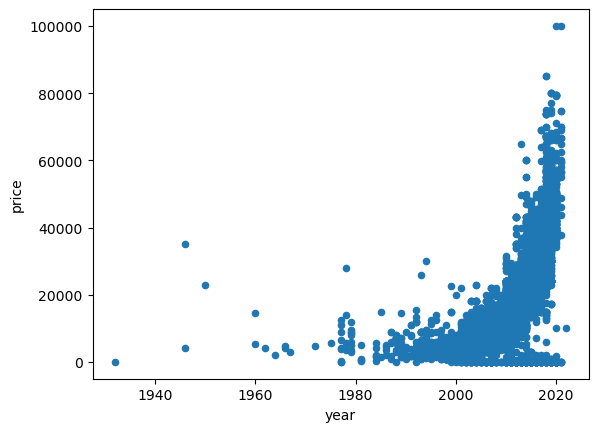

In [35]:
f150.plot.scatter(x='year', y='price')

<Axes: xlabel='odometer', ylabel='price'>

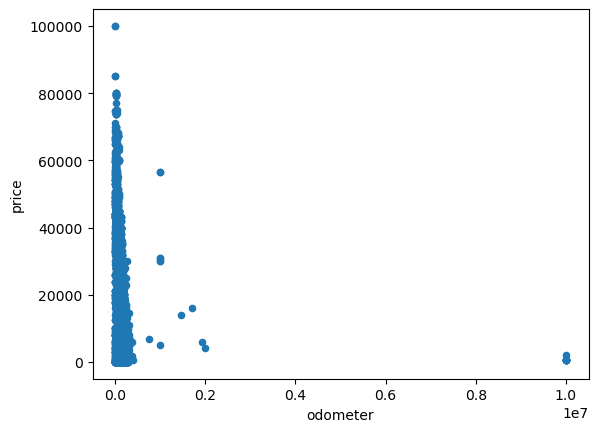

In [36]:
f150.plot.scatter(x='odometer', y='price')